In [27]:
import numpy as np
import scipy
import imageio
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.ndimage as ndi


In [43]:
def format_and_render_plot():
  fig = plt.gcf()
  for ax in fig.axes:
    ax.axis('off')
    plt.tight_layout()
    plt.show()


## Load images

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (630, 630)


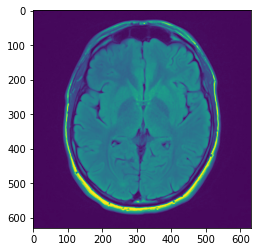

In [39]:
# Load "chest-220.dcm"
im = imageio.imread('mri.jpeg',as_gray=True)

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)
plt.imshow(im)

In [40]:
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
#xfm = ndi.shift(im, shift=(d0, d1))

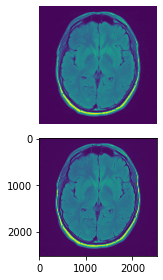

<Figure size 432x288 with 0 Axes>

In [41]:
#xfm = ndi.rotate(xfm, angle=1, reshape=False)

# Resample image
im_dn = ndi.zoom(im, zoom=0.25)
im_up = ndi.zoom(im,zoom=4.00)

# Plot the images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
format_and_render_plot()

Original shape: (630, 630)
Upsampled shape: (2520, 2520) (2520, 2520)


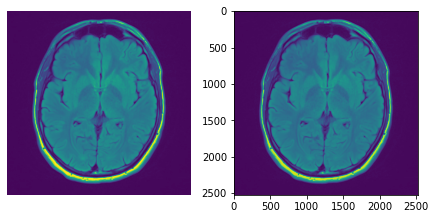

<Figure size 432x288 with 0 Axes>

In [50]:
# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled shape:', up0.shape, up5.shape)

# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0)
axes[1].imshow(up5)
format_and_render_plot()

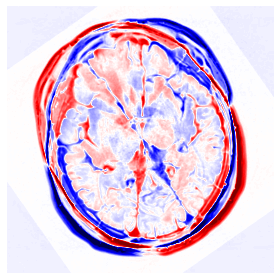

In [58]:
up6 = ndi.rotate(up5, angle=35, reshape=False)
# Calculate image difference
err = up6 - up0

# Plot the difference
plt.imshow(err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

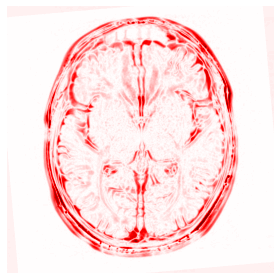

In [53]:
# Calculate absolute image difference
abs_err = np.abs(up6 - up0)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

In [54]:
# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(up6 - up0))
print('MAE:', mean_abs_err)

MAE: 12.15845


In [55]:
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

In [59]:
iou = intersection_of_union(up6, up0)
print(iou)

0.8355335097001764
